In [1]:
!pip install sqlalchemy

In [2]:
import sqlalchemy as db

In [3]:
engine = db.create_engine('sqlite:///Flights')

In [4]:
conn = engine.connect()

In [5]:
metadata = db.MetaData()

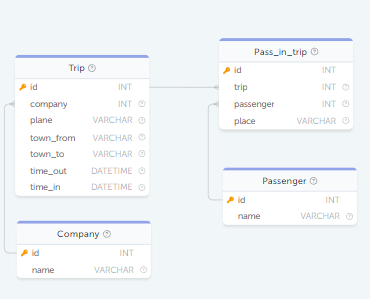

Создаём таблицы (схема БД выше)

In [6]:
trip = db.Table(
    'Trip', metadata,
    db.Column('id', db.Integer, primiry_key = True),
    db.Column('company', db.Integer, db.ForeignKey('Company.id')),
    db.Column('plane', db.VARCHAR),
    db.Column('town_from', db.VARCHAR),
    db.Column('town_to', db.VARCHAR)
)
trip

<ipython-input-6-6bd92121bd52>:3: SAWarning: Can't validate argument 'primiry_key'; can't locate any SQLAlchemy dialect named 'primiry'
  db.Column('id', db.Integer, primiry_key = True),


Table('Trip', MetaData(), Column('id', Integer(), table=<Trip>), Column('company', Integer(), ForeignKey('Company.id'), table=<Trip>), Column('plane', VARCHAR(), table=<Trip>), Column('town_from', VARCHAR(), table=<Trip>), Column('town_to', VARCHAR(), table=<Trip>), schema=None)

In [7]:
company = db.Table(
    'Company', metadata,
    db.Column('id', db.Integer, primary_key = True, autoincrement = True),
    db.Column('name', db.VARCHAR)
)
company

Table('Company', MetaData(), Column('id', Integer(), table=<Company>, primary_key=True, nullable=False), Column('name', VARCHAR(), table=<Company>), schema=None)

In [8]:
pass_in_trip = db.Table(
    'Pass_in_trip', metadata,
    db.Column('id', db.Integer, primary_key = True, autoincrement = True),
    db.Column('trip', db.Integer, db.ForeignKey('Trip.id')),
    db.Column('passenger', db.Integer, db.ForeignKey('Passenger.id')),
    db.Column('place', db.VARCHAR)
)
pass_in_trip

Table('Pass_in_trip', MetaData(), Column('id', Integer(), table=<Pass_in_trip>, primary_key=True, nullable=False), Column('trip', Integer(), ForeignKey('Trip.id'), table=<Pass_in_trip>), Column('passenger', Integer(), ForeignKey('Passenger.id'), table=<Pass_in_trip>), Column('place', VARCHAR(), table=<Pass_in_trip>), schema=None)

In [9]:
passenger = db.Table(
    'Passenger', metadata,
    db.Column('id', db.Integer, primary_key = True, autoincrement = True),
    db.Column('name', db.VARCHAR)
)
passenger

Table('Passenger', MetaData(), Column('id', Integer(), table=<Passenger>, primary_key=True, nullable=False), Column('name', VARCHAR(), table=<Passenger>), schema=None)

In [10]:
metadata.create_all(engine)

Наполняем таблицы данными

In [11]:
insertion_company = company.insert().values([{'name': 'Aeroflot'}, {'name': 'Belavia'}, {'name': 'Ryanair'}])

insertion_passenger = passenger.insert().values(
    [{'name': 'Ivanov'},
     {'name': 'Smirnov'},
     {'name': 'Sobolev'}])

insertion_trip = trip.insert().values(
    [{'id': 1, 'company': 1, 'plane': 'TU-176', 'town_from': 'Moscow', 'town_to': 'Donetsck'},
     {'id': 2, 'company': 2, 'plane': 'Boeing', 'town_from': 'Minsk', 'town_to': 'Berlin'},
     {'id': 3, 'company': 3, 'plane': 'Boeing', 'town_from': 'London', 'town_to': 'Praha'}])

insertion_pass_in_trip = pass_in_trip.insert().values(
    [{'trip': 1, 'passenger' : 1, 'place' : '28A'},
     {'trip': 2, 'passenger' : 2, 'place' : '37C'},
     {'trip': 3, 'passenger' : 3, 'place' : '1B'}])

In [12]:
conn.execute(insertion_company)

In [13]:
conn.execute(insertion_passenger)

In [14]:
conn.execute(insertion_trip)

In [15]:
conn.execute(insertion_pass_in_trip)

Формируем запросы

In [16]:
select_all = db.select(trip)
select_all_result = conn.execute(select_all)
select_all_result

In [17]:
select_all_result.fetchall()

[(1, 1, 'TU-176', 'Moscow', 'Donetsck'),
 (2, 2, 'Boeing', 'Minsk', 'Berlin'),
 (3, 3, 'Boeing', 'London', 'Praha')]

HAVING (вывести группы с названиями самолётов 'plane', в которых больше одной записи, и кол-во записей в них)

In [18]:
select_having = db.select(trip.c.plane, db.func.count()).group_by('plane').having(db.func.count() > 1)
select_having_result = conn.execute(select_having)


In [19]:
select_having_result.fetchall()

[('Boeing', 2)]

Coming soon...
